<div style="text-align:center;">
    <h1>Group 1, Milestone 3</h1>
    <h2>AC209a, Fall 2024</h2>
</div>

## Data Refinement and EDA

In [69]:
import pandas as pd
import re
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

projects_df = pd.read_excel('Milestone_2/CFU-Website-MASTER-February-2024.xlsx', sheet_name='Projects' )

columns_to_rename = {
    'Theme/Objective': 'Theme',
    'Sector (OECD)': 'Sector',
    'Amount of Funding Approved (USD millions)': 'Total Funding',
    ' Disbursed (USD millions)': 'Disbursed'
}

projects_df.rename(columns=columns_to_rename, inplace=True)

projects_df.head()

,Fund,Fund Type,Country,World Bank Region,Income Classification,Name of Project,Theme,Sector,DAC 5 Code,Sub-Sector,...,End year,Concessional loan,Grant,Guarantee,Equity,Total Funding,Disbursed,Least Developed Country,Small Island Developing Nation,Fragile or Conflict Affected State
0,Green Climate Fund (GCF-1),Multilateral,Sri Lanka,South Asia,Lower middle income,(FP124) Strengthening Climate Resilience of Su...,Adaptation,Water Supply & Sanitation,DAC140_,Water sector policy and administrative management,...,2026,NaN,39.78,NaN,NaN,39.78,4.18,NaN,NaN,NaN
1,Global Environment Facility (GEF7),Multilateral,India,South Asia,Lower middle income,Accelerating adoption of super-efficient techn...,Multiple Foci,Energy,DAC230_,NaN,...,NaN,NaN,4.42,NaN,NaN,4.42,NaN,NaN,NaN,NaN
2,Global Environment Facility (GEF4),Multilateral,India,South Asia,Lower middle income,Achieving Reduction in GHG Emissions through A...,Mitigation - General,Energy,DAC230_,"Energy generation, distribution and efficiency...",...,NaN,NaN,0.25,NaN,NaN,0.25,0.25,NaN,NaN,NaN
3,Least Developed Countries Fund (LDCF),Multilateral,Afghanistan,South Asia,Low income,Adapting Afghan Communities to Climate-Induced...,Adaptation,Disaster Prevention & Preparedness,DAC740_,Disaster prevention and preparedness,...,NaN,NaN,5.60,NaN,NaN,5.60,NaN,LDC,NaN,FCAS
4,Least Developed Countries Fund (LDCF),Multilateral,Bhutan,South Asia,Lower middle income,Enhancing the Climate Resilience of Urban Land...,Adaptation,Disaster Prevention & Preparedness,DAC740_,Multi-hazard response preparedness,...,NaN,NaN,18.05,NaN,NaN,18.05,NaN,LDC,NaN,NaN


### Basic summary of the data ###

In this part, we examine basic information of the raw data, including shape, data types, and descriptive statistics. 

* We notice that some entries of the data set are "Not applicable", we are going to replace them with NaN to ensure the count of missing data is correct.
* We also convert numerical columns to float data type, and we only present descriptive statistics for these columns.

In [70]:
projects_df.replace('Not applicable', float('nan'), inplace=True)
numerical_cols= ['Approved year', 'End year', 'Concessional loan', 'Grant', 'Guarantee', 'Equity', 'Total Funding', 'Disbursed']
for col in numerical_cols:
    projects_df[col] = pd.to_numeric(projects_df[col], errors='coerce')

projects_df[['Approved year', 'End year']] = projects_df[['Approved year', 'End year']].astype('Int64')

In [71]:
projects_summary = {
    "Shape": projects_df.shape,
    "Data Types": projects_df.dtypes,
    "Missing Values": projects_df.isnull().sum(),
    "Summary Statistics": projects_df[numerical_cols].describe(include='all')
}

In [72]:
print('Shape of the data set:', projects_summary["Shape"])

Shape of the data set: (3428, 26)


In [73]:
print('Data Types of all columns:')
print(projects_summary["Data Types"])

Data Types of all columns:
Fund                                   object
Fund Type                              object
Country                                object
World Bank Region                      object
Income Classification                  object
Name of Project                        object
Theme                                  object
Sector                                 object
DAC 5 Code                             object
Sub-Sector                             object
Key words                              object
Summary                                object
Implementing Agency                    object
Recipient Institution                  object
Recipient Institution type             object
Approved year                           Int64
End year                                Int64
Concessional loan                     float64
Grant                                 float64
Guarantee                             float64
Equity                                float64
Total F

In [74]:
print('Number of missing values in each column:')
print(projects_summary["Missing Values"])

Number of missing values in each column:
Fund                                     0
Fund Type                                0
Country                                  0
World Bank Region                      193
Income Classification                  468
Name of Project                          0
Theme                                    0
Sector                                   0
DAC 5 Code                               0
Sub-Sector                             211
Key words                             1898
Summary                               1779
Implementing Agency                     58
Recipient Institution                 1457
Recipient Institution type            3004
Approved year                           45
End year                              2140
Concessional loan                     3149
Grant                                   88
Guarantee                             3415
Equity                                3407
Total Funding                            0
Disbursed    

In [75]:
print('Descriptive Statistics of data columns')
print(projects_summary["Summary Statistics"])

Descriptive Statistics of data columns
       Approved year    End year  Concessional loan        Grant   Guarantee  \
count         3383.0      1288.0         279.000000  3340.000000   13.000000   
mean     2016.241502  2020.46972          40.412401     6.068698   28.659231   
std         4.499021    4.567955          54.187711    13.538716   33.533696   
min           2003.0      2005.0           0.100000     0.000000    1.500000   
25%           2013.0      2017.0           9.300000     0.640000    9.000000   
50%           2017.0      2021.0          20.000000     2.455000   13.000000   
75%           2020.0      2023.0          49.235000     6.340000   30.000000   
max           2023.0      2042.0         344.000000   307.390000  100.000000   

           Equity  Total Funding    Disbursed  
count   21.000000    3428.000000  2457.000000  
mean    74.502576       9.764399     5.520662  
std     67.727454      25.935438    14.805122  
min      4.654103       0.000000     0.000000  


### Data Missingness ###

In this part, we address the data missingness issue and implement dropping/imputation as needed.

* The main response variable **Total Funding** does not have missing value.
* For the numerical columns - **Concessional loan, Grant, Guarantee, Equity, Disbursed**, we can simply replace the missing values by 0. Missing value in these columns suggests that no funds were allocated or contributed, replacing NaN with 0 can reflect this status meaningfully.
* For **Approved year, End year, Sub-Sector, Key words, Summary, Implementing Agency, Recipient Institution, Recipient Institution type** columns, we do not need to handle them now because they are potentially not directly related to the research question. If later data analysis involves these variables, we are going to drop them accordingly.
* For **Least Developed Country, Small Island Developing Nation, Fragile or Conflict Affected State** columns, we can replace the filled entries by boolean Yes and empty entries by No. This is because missing values in these columns simply mean the countries do not belong to these category.
* For **World Bank Region, Income Classification** columns, we notice that the missing values happen when the entries of **Country** are Global, Regional, or Multi-countries. Here, we can implement dropping/imputation according to the following rules:
  * If the entries of **Country** are Global, Regional, or Multi-country without any additional information, we simply drop these rows.
  * If the entries of **Country** are Global, Regional, or Multi-country followed by a list of countries (in parentheses), we impute the most common values based on the dominant region or income classification in the list of countries. If imputation fails (i.e. the list of countries do not have data in the data set to impute the value), we drop these rows as well.

For all the data dropping, we do not implement it now. When the later data analysis involves these variables, we are going to drop them accordingly.

In [76]:
# implement bullet points 2 and 4
projects_df[['Concessional loan', 'Grant', 'Guarantee', 'Equity', 'Disbursed']] = projects_df[['Concessional loan', 'Grant', 'Guarantee', 'Equity', 'Disbursed']].fillna(0)
projects_df[['Least Developed Country', 'Small Island Developing Nation', 'Fragile or Conflict Affected State']] = projects_df[['Least Developed Country', 'Small Island Developing Nation', 'Fragile or Conflict Affected State']].notna()

In [77]:
# implement bullet point 5
# extract country names from entries like "Global (A, B, C)" or "Global (A and B)"
def extract_countries(text):
    match = re.search(r"\((.*?)\)", text)
    if match:
        return re.split(r',\s*| and ', match.group(1))
    return []

# create a helper DataFrame to map each unique country to its World Bank Region and Income Classification
country_info_mapping = projects_df[~projects_df['Country'].str.contains("Global|Regional|Multi-country", na=False)]
country_info_mapping = country_info_mapping[['Country', 'World Bank Region', 'Income Classification']].dropna().drop_duplicates()

# function to get the majority region and income classification for a list of countries
def get_majority_value(country_list, column_name):
    values = country_info_mapping[country_info_mapping['Country'].isin(country_list)][column_name].tolist()
    if values:
        most_common_value = Counter(values).most_common(1)[0][0]
        return most_common_value
    return None

# apply the extraction and majority calculation for both columns
projects_df['Extracted Countries'] = projects_df['Country'].apply(lambda x: extract_countries(x) if "Global" in x or "Regional" in x or "Multi-country" in x else None)

# get inferred values for both 'World Bank Region' and 'Income Classification'
projects_df['Inferred Region'] = projects_df['Extracted Countries'].apply(lambda x: get_majority_value(x, 'World Bank Region') if x else None)
projects_df['Inferred Income Classification'] = projects_df['Extracted Countries'].apply(lambda x: get_majority_value(x, 'Income Classification') if x else None)

# impute missing values in 'World Bank Region' and 'Income Classification' with the inferred values
projects_df['World Bank Region'] = projects_df['World Bank Region'].combine_first(projects_df['Inferred Region'])
projects_df['Income Classification'] = projects_df['Income Classification'].combine_first(projects_df['Inferred Income Classification'])

# drop helper columns
projects_df.drop(['Extracted Countries', 'Inferred Region', 'Inferred Income Classification'], axis=1, inplace=True)

In [78]:
print('Number of missing values in each column after data missingness handling:')
print(projects_df.isnull().sum())

Number of missing values in each column after data missingness handling:
Fund                                     0
Fund Type                                0
Country                                  0
World Bank Region                      156
Income Classification                  329
Name of Project                          0
Theme                                    0
Sector                                   0
DAC 5 Code                               0
Sub-Sector                             211
Key words                             1898
Summary                               1779
Implementing Agency                     58
Recipient Institution                 1457
Recipient Institution type            3004
Approved year                           45
End year                              2140
Concessional loan                        0
Grant                                    0
Guarantee                                0
Equity                                   0
Total Funding           

### Data Scaling and Transformation ###

In this part, we perform the data scaling or transformation needed for later data analysis:

* We print out the unique values in categorical columns **Fund Type, World Bank Region, Income Classification, Theme, Sector** to check if there are duplicate values that differ only by lower/uppercase. Then we eliminate these duplication by applying case conversion.
* We perform one-hot encoding for these categorical columns to help with future analysis.
* For the numerical columns, none of them features wildly divergent scales, so we do not scale them to avoid complication in result intepretation later.

In [79]:
categorical_cols = ['Fund Type', 'World Bank Region', 'Income Classification', 'Theme', 'Sector']

for col in categorical_cols:
    print(f'Unique values in {col} are:')
    print(projects_df[col].unique())
    print()

Unique values in Fund Type are:
['Multilateral' 'Multi Donor National' 'Multi Donor Regional']

Unique values in World Bank Region are:
['South Asia' 'Latin America & Caribbean' 'Europe & Central Asia'
 'Middle East & North Africa' 'Sub-Saharan Africa' 'East Asia & Pacific'
 None 'Western Asia']

Unique values in Income Classification are:
['Lower middle income' 'Low income' None 'Upper middle income'
 'High income']

Unique values in Theme are:
['Adaptation' 'Multiple Foci' 'Mitigation - General' 'Multiple foci'
 'Mitigation - REDD']

Unique values in Sector are:
['Water Supply & Sanitation' 'Energy' 'Disaster Prevention & Preparedness'
 'General environment protection' 'Transport & Storage'
 'Other Multisector' 'Unallocated / Unspecified' 'Agriculture'
 'Banking & Financial Services' 'Forestry'
 'General Environment Protection' 'Energy generation, renewable sources'
 'Government & Civil Society' 'Education' 'Industry'
 'Energy generation, non-renewable sources' 'Fishing' 'Other multi

We can see duplications appear in Theme and Sector. Thus, we are going to do case conversion.

In [80]:
projects_df['Theme'] = projects_df['Theme'].str.lower()
projects_df['Sector'] = projects_df['Sector'].str.lower()

Perform one-hot encoding on categorical columns. For simplicity, we are going to use projects_df_ohe only for later data analysis. For the rest of this milestone 3, we are still using the original data frame.

In [81]:
ohe = OneHotEncoder(drop='first', sparse_output=False)
ohe_matrix = ohe.fit_transform(projects_df[categorical_cols])
df_ohe = pd.DataFrame(ohe_matrix, columns=ohe.get_feature_names_out())
projects_df_ohe = pd.concat([projects_df, df_ohe], axis=1)

### EDA Visualization ###

1. We create 4 bar plots to show the distribution of different fund types, world bank regions, income classification, and theme.

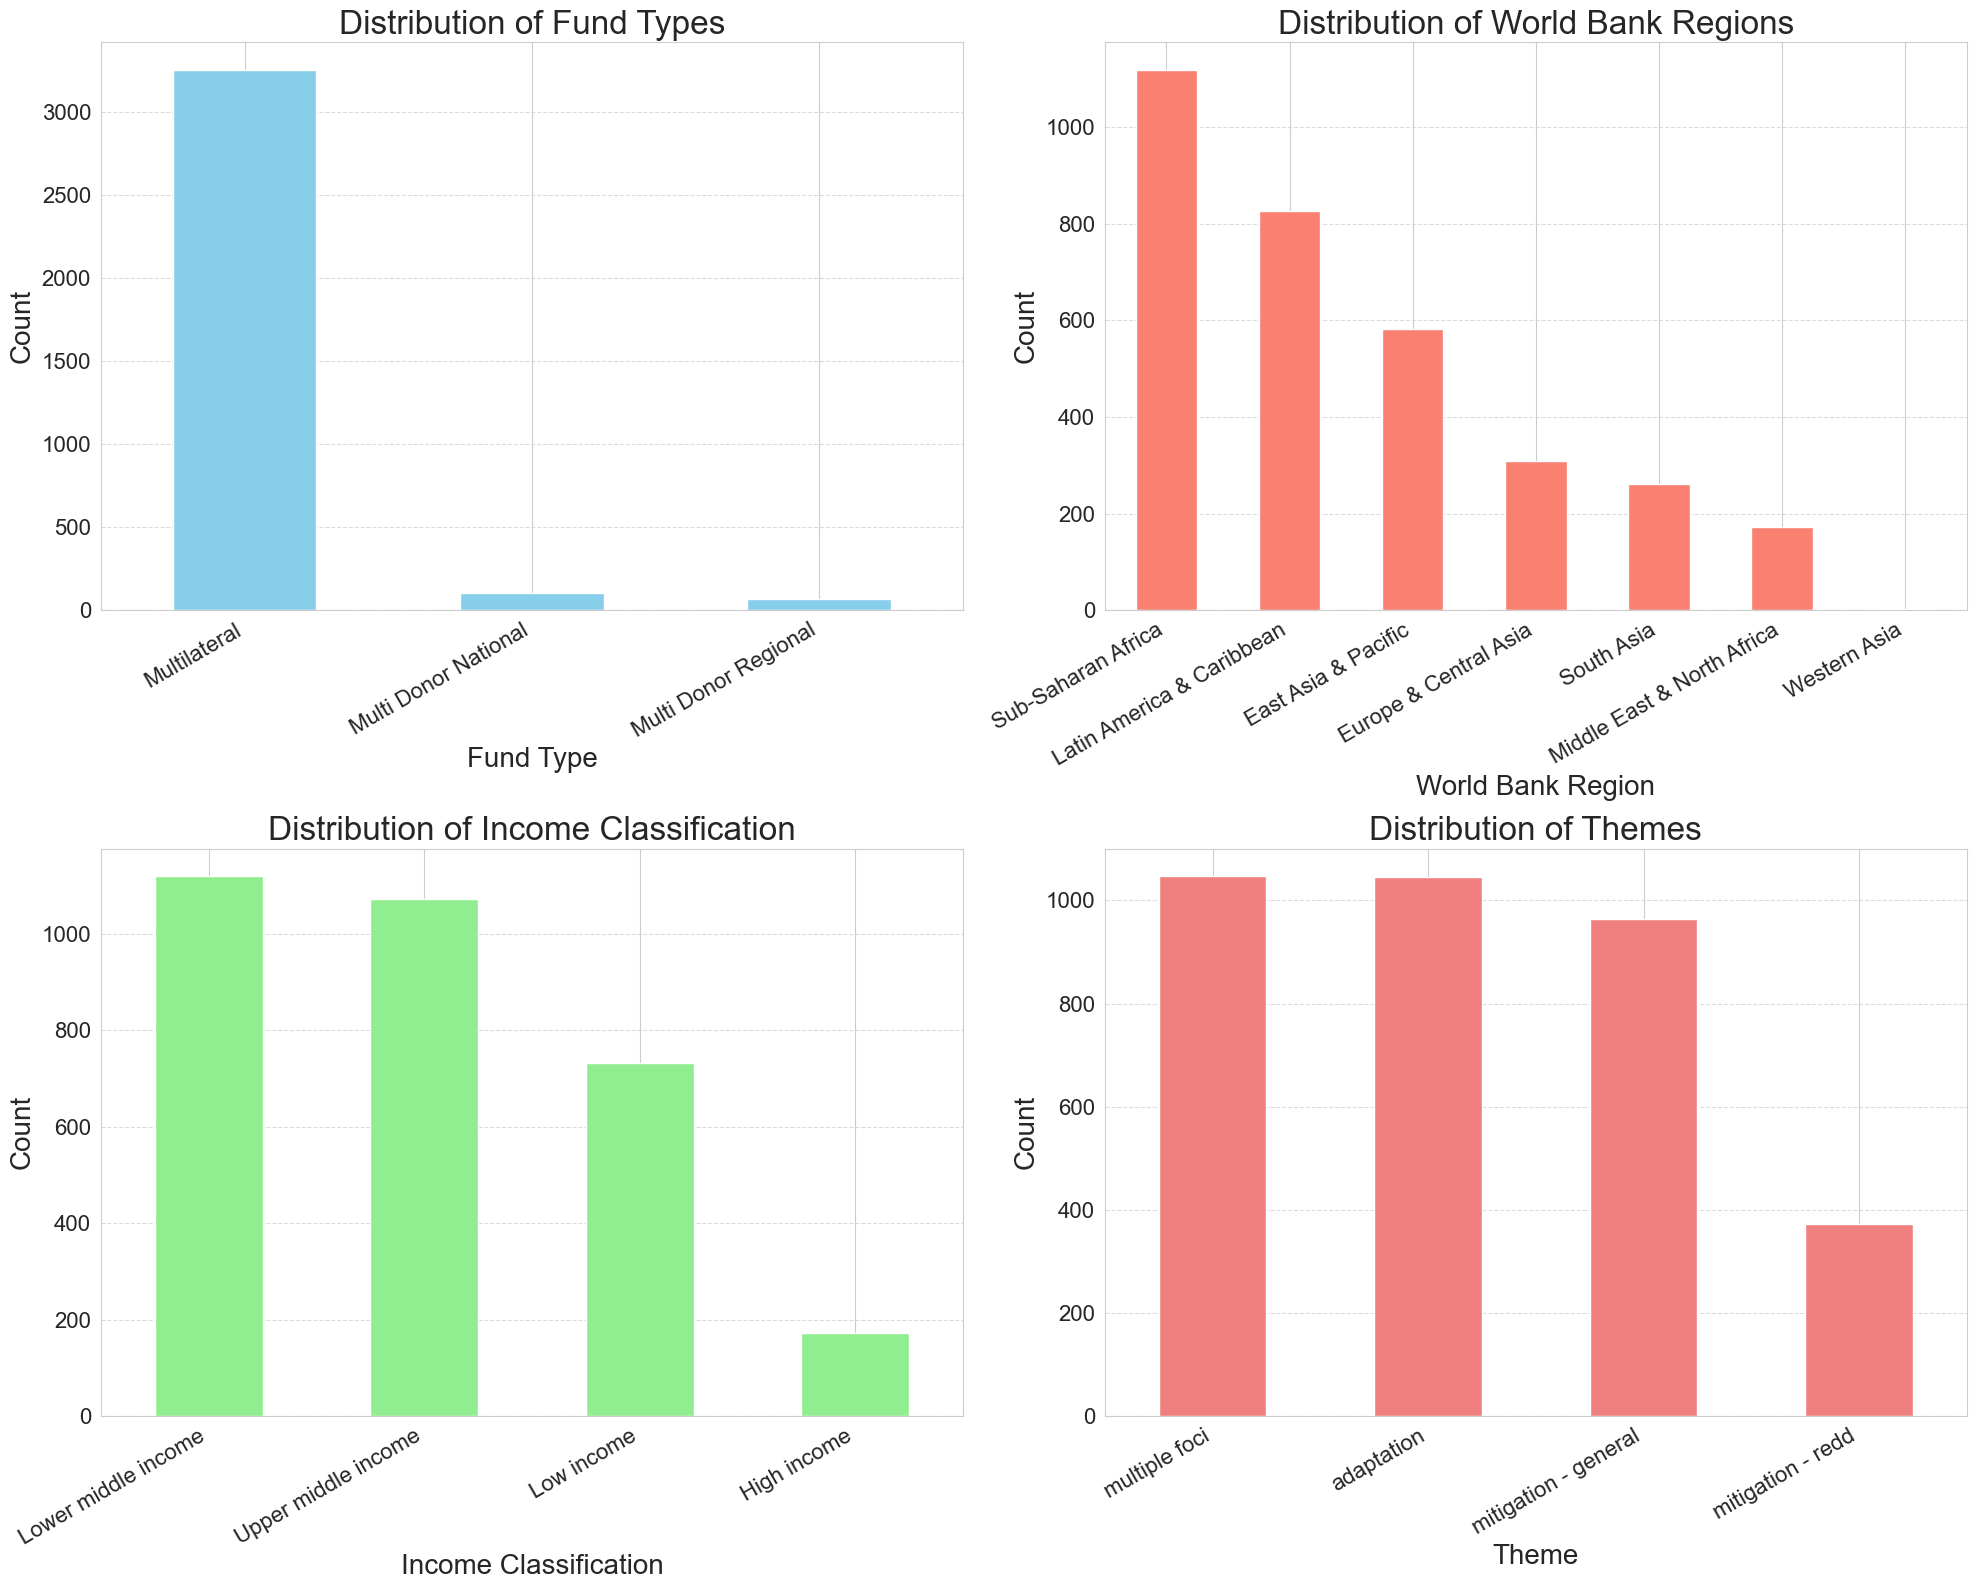

In [82]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Plot 1: Distribution of Fund Types
projects_df['Fund Type'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Fund Types', fontsize=24)
axes[0, 0].set_xlabel('Fund Type', fontsize=20)
axes[0, 0].set_ylabel('Count', fontsize=20)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=30, ha='right')
axes[0, 0].tick_params(axis='both', which='major', labelsize=16)

# Plot 2: Distribution of World Bank Regions
projects_df['World Bank Region'].value_counts().plot(kind='bar', ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribution of World Bank Regions', fontsize=24)
axes[0, 1].set_xlabel('World Bank Region', fontsize=20)
axes[0, 1].set_ylabel('Count', fontsize=20)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=30, ha='right')
axes[0, 1].tick_params(axis='both', which='major', labelsize=16)


# Plot 3: Distribution of Income Classification
projects_df['Income Classification'].value_counts().plot(kind='bar', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Distribution of Income Classification', fontsize=24)
axes[1, 0].set_xlabel('Income Classification', fontsize=20)
axes[1, 0].set_ylabel('Count', fontsize=20)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=30, ha='right')
axes[1, 0].tick_params(axis='both', which='major', labelsize=16)

# Plot 4: Distribution of Themes
projects_df['Theme'].value_counts().plot(kind='bar', ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_title('Distribution of Themes', fontsize=24)
axes[1, 1].set_xlabel('Theme', fontsize=20)
axes[1, 1].set_ylabel('Count', fontsize=20)
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=30, ha='right')
axes[1, 1].tick_params(axis='both', which='major', labelsize=16)


plt.tight_layout()
plt.show()

2. We create 4 box plots for funding amounts by funding type, world bank region, income classification, and theme.

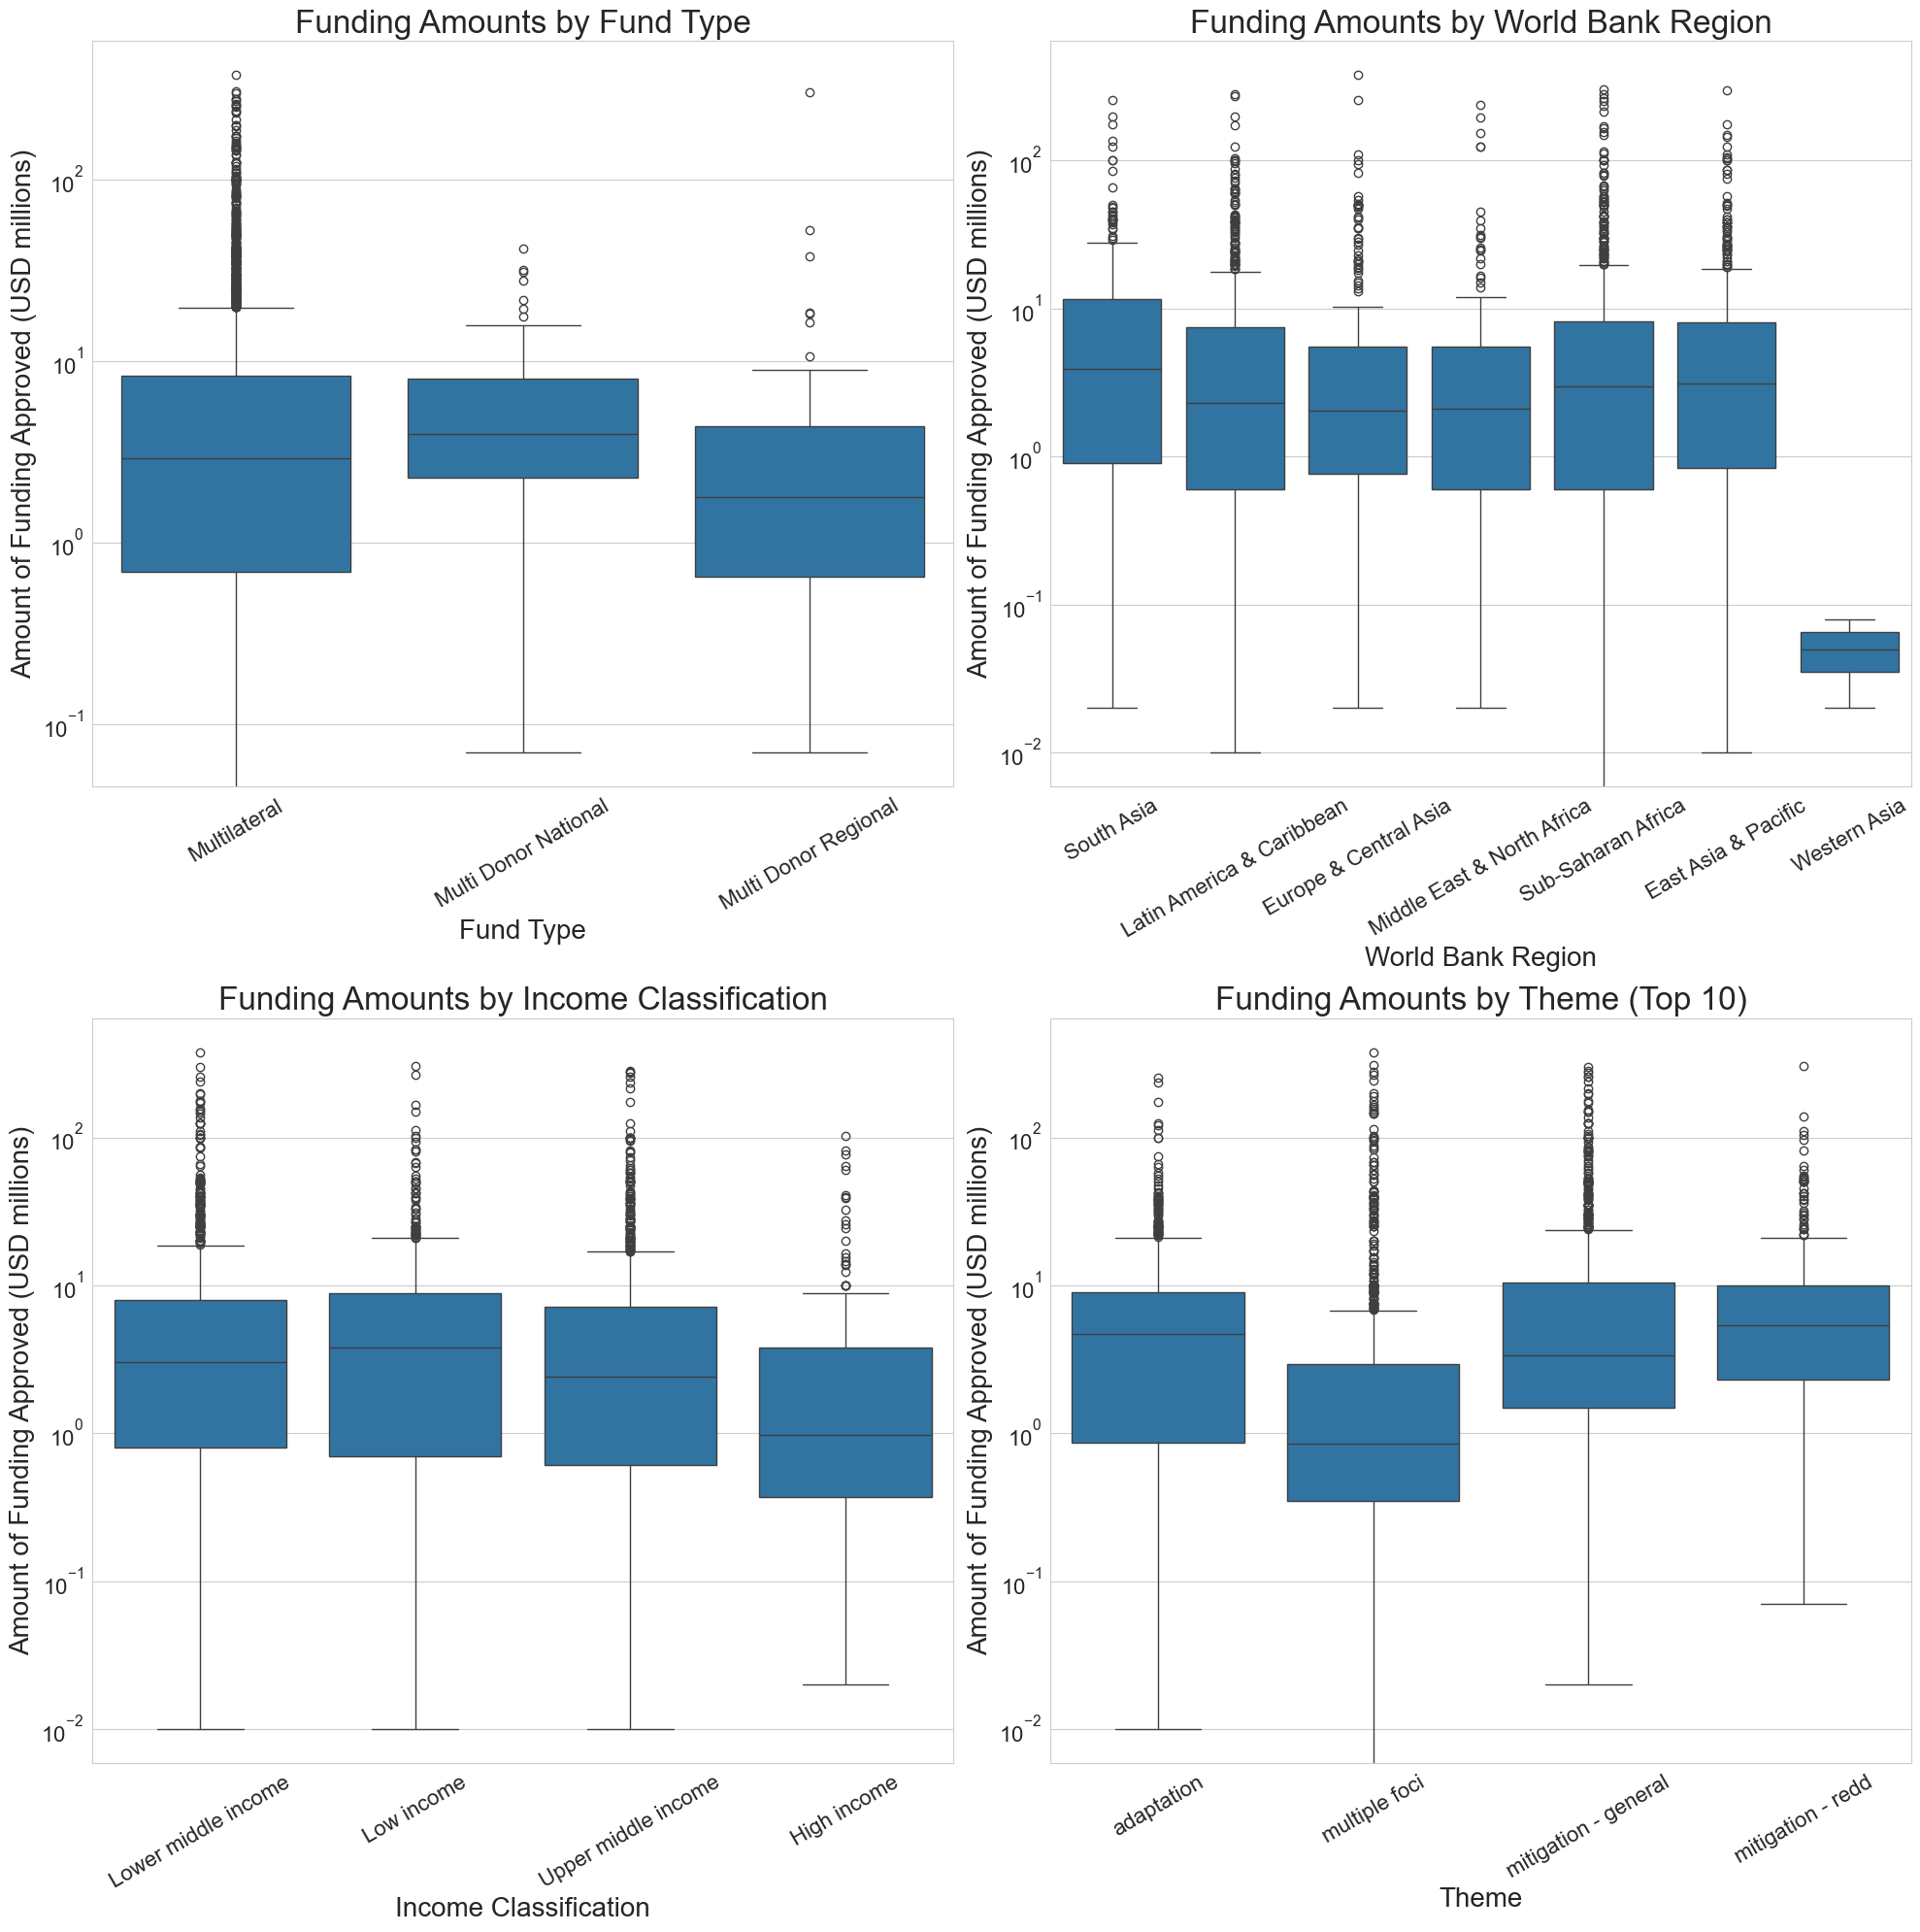

In [83]:
# Set up a 2x2 subplot grid for the box plots
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# Plot 1: Box plot of Funding Amounts by Fund Type
sns.boxplot(x='Fund Type', y='Total Funding', data=projects_df, ax=axes[0, 0])
axes[0, 0].set_title('Funding Amounts by Fund Type', fontsize=24)
axes[0, 0].set_xlabel('Fund Type', fontsize=20)
axes[0, 0].set_ylabel('Amount of Funding Approved (USD millions)', fontsize=20)
axes[0, 0].tick_params(axis='both', which='major', labelsize=16)
axes[0, 0].tick_params(axis='x', rotation=30)
axes[0, 0].set_yscale('log')


# Plot 2: Box plot of Funding Amounts by World Bank Region
sns.boxplot(x='World Bank Region', y='Total Funding', data=projects_df, ax=axes[0, 1])
axes[0, 1].set_title('Funding Amounts by World Bank Region', fontsize=24)
axes[0, 1].set_xlabel('World Bank Region', fontsize=20)
axes[0, 1].set_ylabel('Amount of Funding Approved (USD millions)', fontsize=20)
axes[0, 1].tick_params(axis='both', which='major', labelsize=16)
axes[0, 1].tick_params(axis='x', rotation=30)
axes[0, 1].set_yscale('log')

# Plot 3: Box plot of Funding Amounts by Income Classification
sns.boxplot(x='Income Classification', y='Total Funding', data=projects_df, ax=axes[1, 0])
axes[1, 0].set_title('Funding Amounts by Income Classification', fontsize=24)
axes[1, 0].set_xlabel('Income Classification', fontsize=20)
axes[1, 0].set_ylabel('Amount of Funding Approved (USD millions)', fontsize=20)
axes[1, 0].tick_params(axis='both', which='major', labelsize=16)
axes[1, 0].tick_params(axis='x', rotation=30)
axes[1, 0].set_yscale('log')

# Plot 4: Box plot of Funding Amounts by Theme
sns.boxplot(x='Theme', y='Total Funding', data=projects_df, ax=axes[1, 1])
axes[1, 1].set_title('Funding Amounts by Theme (Top 10)', fontsize=24)
axes[1, 1].set_xlabel('Theme', fontsize=20)
axes[1, 1].set_ylabel('Amount of Funding Approved (USD millions)', fontsize=20)
axes[1, 1].tick_params(axis='both', which='major', labelsize=16)
axes[1, 1].tick_params(axis='x', rotation=30)
axes[1, 1].set_yscale('log')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


3. We can also create 2 line plots to understand how the number of projects and total fundings change over time.

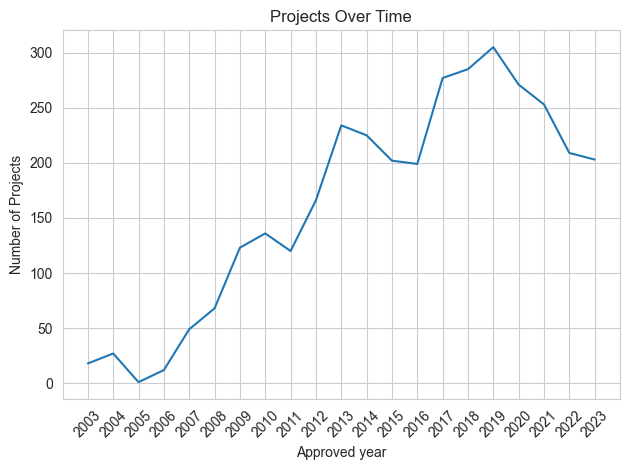

In [84]:
ax = projects_df.groupby('Approved year').size().plot(kind='line', title='Projects Over Time')
ax.set_xlabel('Approved year')
ax.set_ylabel('Number of Projects')
ax.set_xticks(range(int(projects_df['Approved year'].min()), int(projects_df['Approved year'].max()) + 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

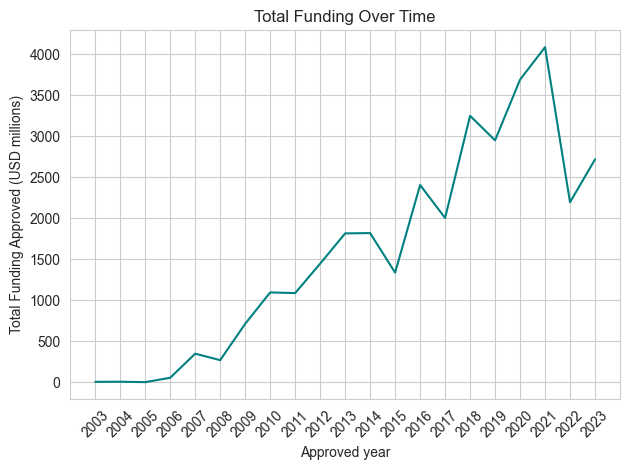

In [85]:
funding_over_time = projects_df.groupby('Approved year')['Total Funding'].sum()

ax = funding_over_time.plot(kind='line', title='Total Funding Over Time', color='teal')
ax.set_xlabel('Approved year')
ax.set_ylabel('Total Funding Approved (USD millions)')
ax.set_xticks(range(int(projects_df['Approved year'].min()), int(projects_df['Approved year'].max()) + 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Observed Patterns/Trends in the Data: ##

## Insights from the Data Useful for Modeling ##

The following code blocks create plots and statistics that create relevant insights for the modeling process, and are discussed in the accompanying milestone 3 document.

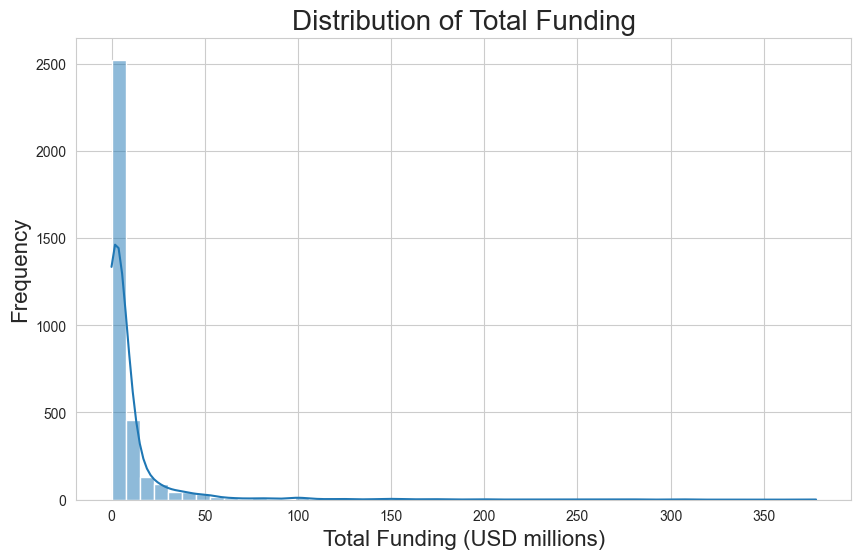

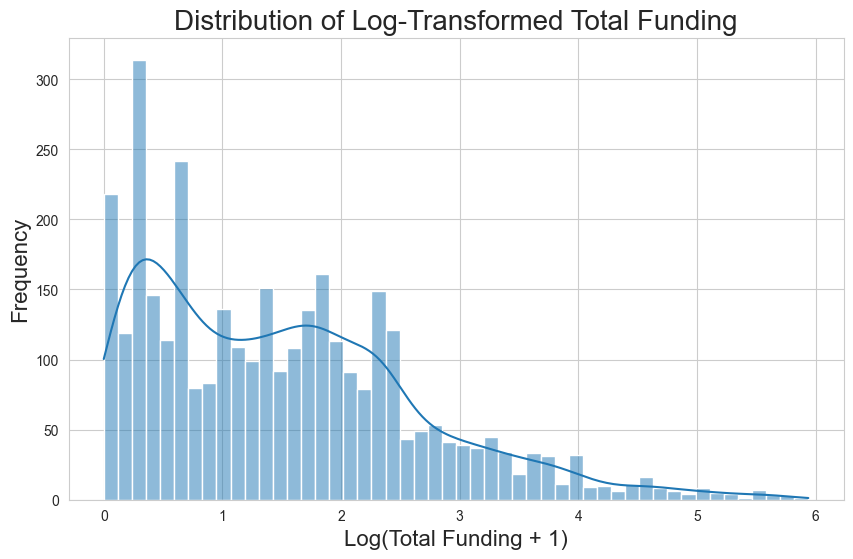

In [86]:
plt.figure(figsize=(10,6))
sns.histplot(projects_df['Total Funding'], bins=50, kde=True)
plt.title('Distribution of Total Funding', fontsize=20)
plt.xlabel('Total Funding (USD millions)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()

projects_df['Log_Total_Funding'] = np.log1p(projects_df['Total Funding'])
plt.figure(figsize=(10,6))
sns.histplot(projects_df['Log_Total_Funding'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Total Funding', fontsize=20)
plt.xlabel('Log(Total Funding + 1)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()

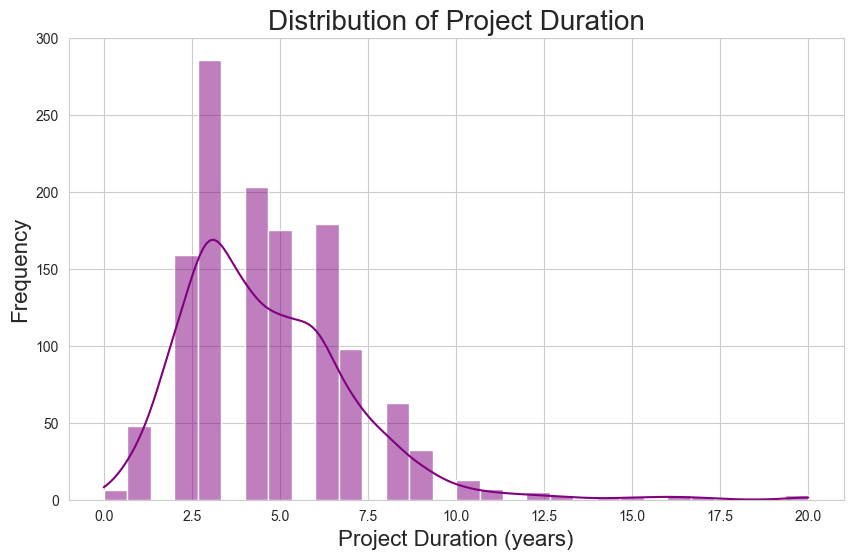

In [87]:
projects_df['Project_Duration'] = projects_df['End year'] - projects_df['Approved year']

plt.figure(figsize=(10,6))
sns.histplot(projects_df['Project_Duration'], bins=30, kde=True, color='purple')
plt.title('Distribution of Project Duration', fontsize=20)
plt.xlabel('Project Duration (years)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()

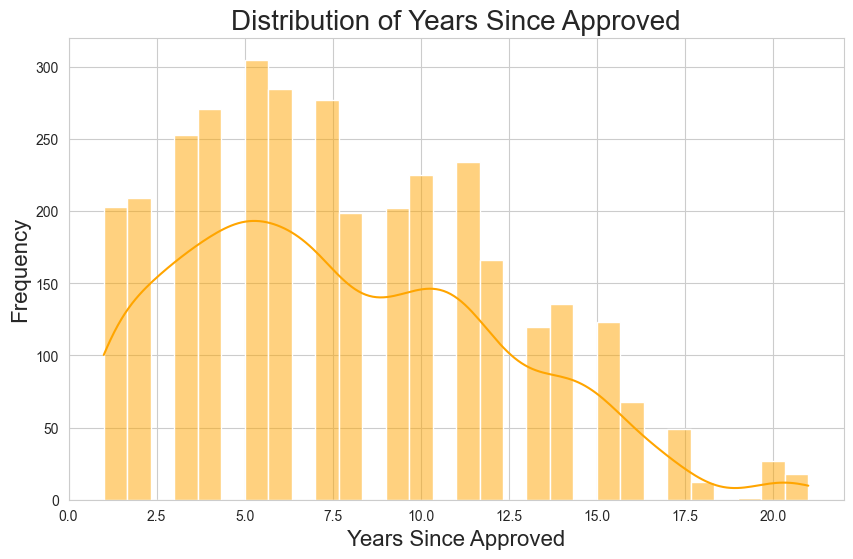

In [88]:
from datetime import datetime
reference_year = datetime.now().year

projects_df['Years_Since_Approved'] = reference_year - projects_df['Approved year']
projects_df.loc[projects_df['Years_Since_Approved'] < 0, 'Years_Since_Approved'] = 0

plt.figure(figsize=(10,6))
sns.histplot(projects_df['Years_Since_Approved'], bins=30, kde=True, color='orange')
plt.title('Distribution of Years Since Approved', fontsize=20)
plt.xlabel('Years Since Approved', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()

Sector
unallocated / unspecified                   845
forestry                                    407
energy                                      370
general environment protection              367
energy generation, renewable sources        283
agriculture                                 265
other multisector                           243
water supply & sanitation                   147
transport & storage                         126
disaster prevention & preparedness          122
industry                                     57
government & civil society                   45
business & other services                    44
banking & financial services                 30
agriculture, forestry, fishing               23
fishing                                      14
energy policy                                13
energy distribution                           7
health                                        7
education                                     5
tourism                          

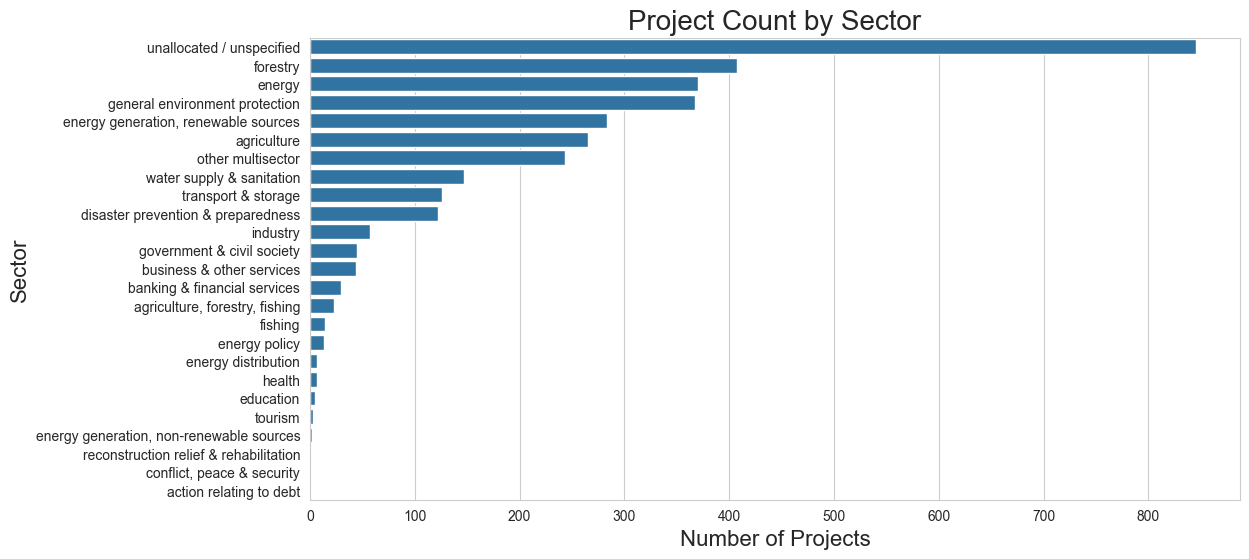

In [89]:
sector_counts = projects_df['Sector'].value_counts()
print(sector_counts)

plt.figure(figsize=(12,6))
sns.countplot(y='Sector', data=projects_df, order=sector_counts.index)
plt.title('Project Count by Sector', fontsize=20)
plt.xlabel('Number of Projects', fontsize=16)
plt.ylabel('Sector', fontsize=16)
plt.show()

In [90]:
Q1 = projects_df['Total Funding'].quantile(0.25)
Q3 = projects_df['Total Funding'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = projects_df[(projects_df['Total Funding'] < lower_bound) | (projects_df['Total Funding'] > upper_bound)]
num_outliers = outliers.shape[0]
total_data = projects_df.shape[0]
proportion_outliers = (num_outliers / total_data) * 100

print(f"Number of outliers: {num_outliers}")
print(f"Proportion of outliers: {proportion_outliers:.2f}%")

Number of outliers: 367
Proportion of outliers: 10.71%
